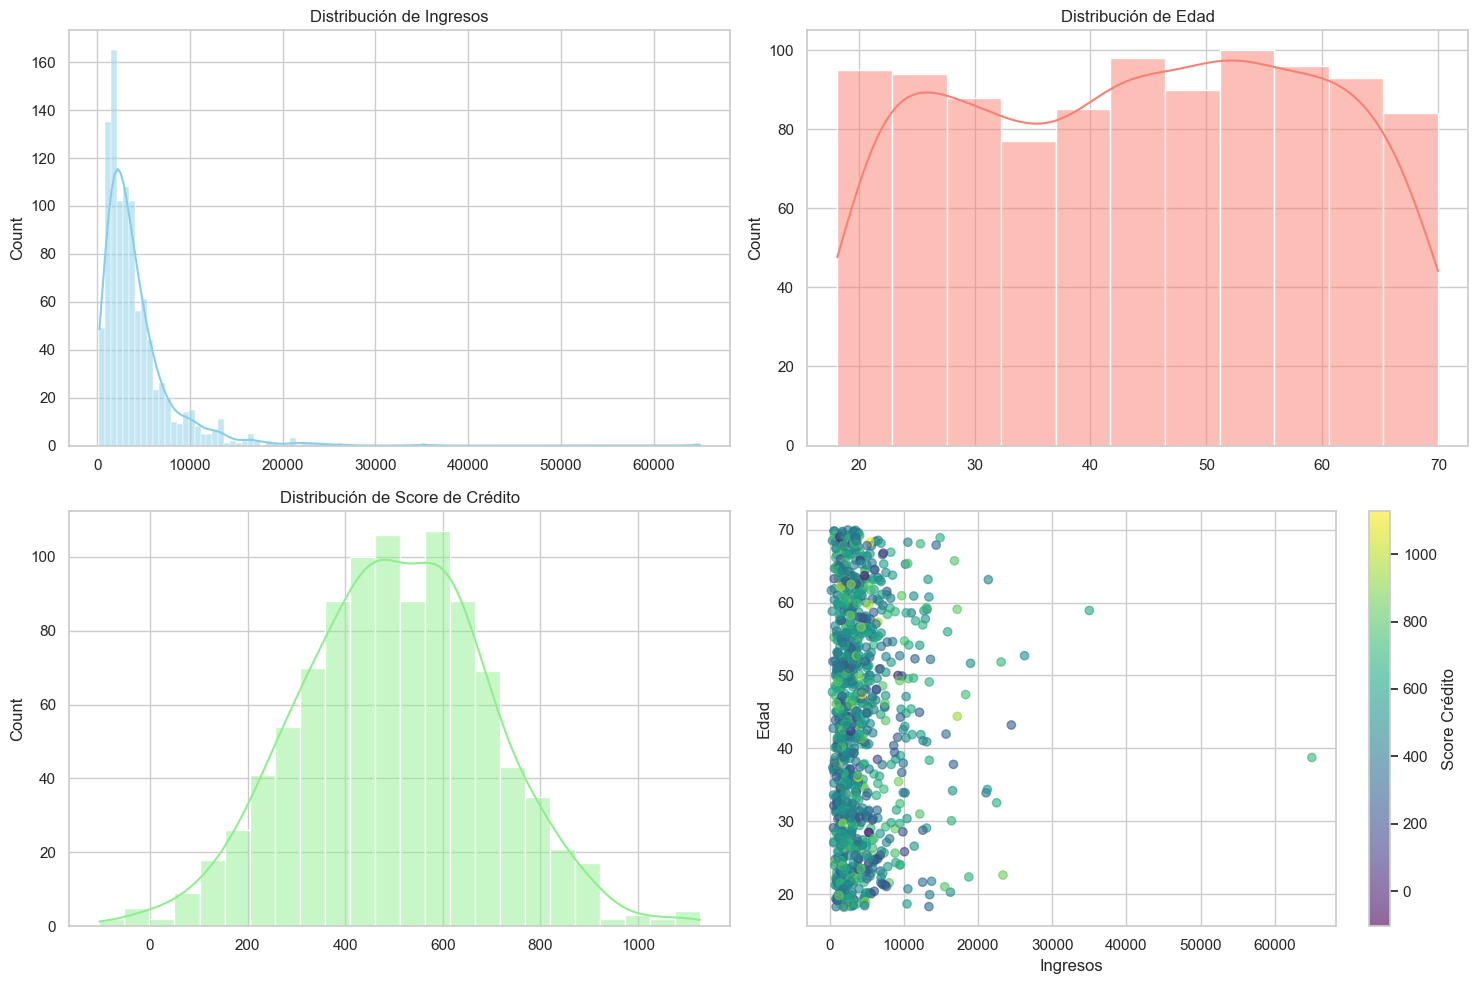

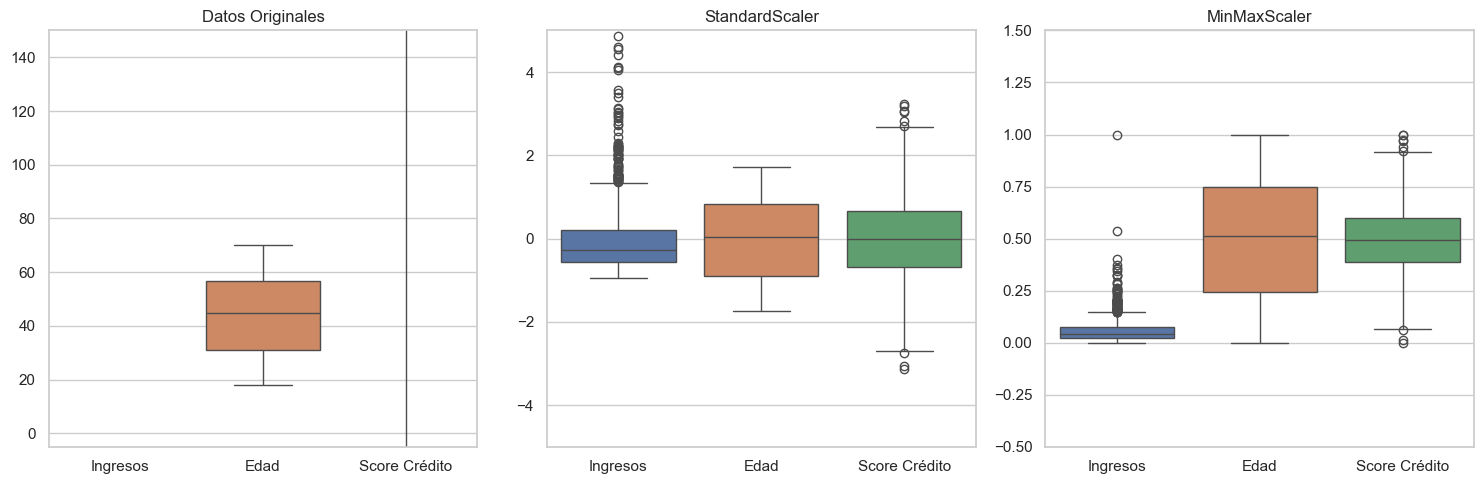

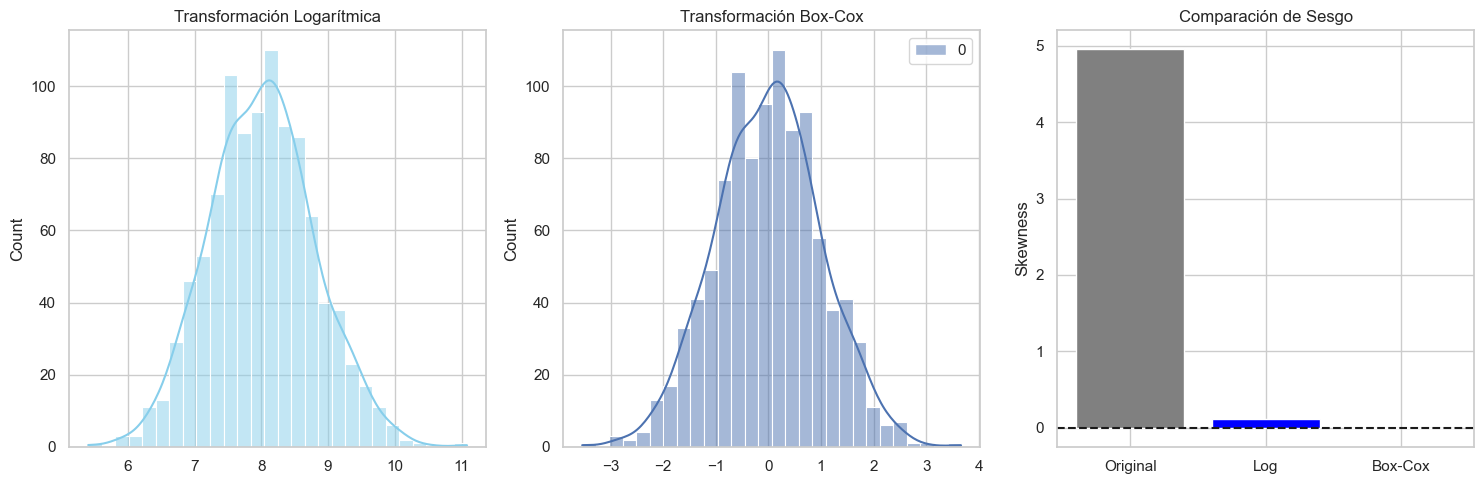

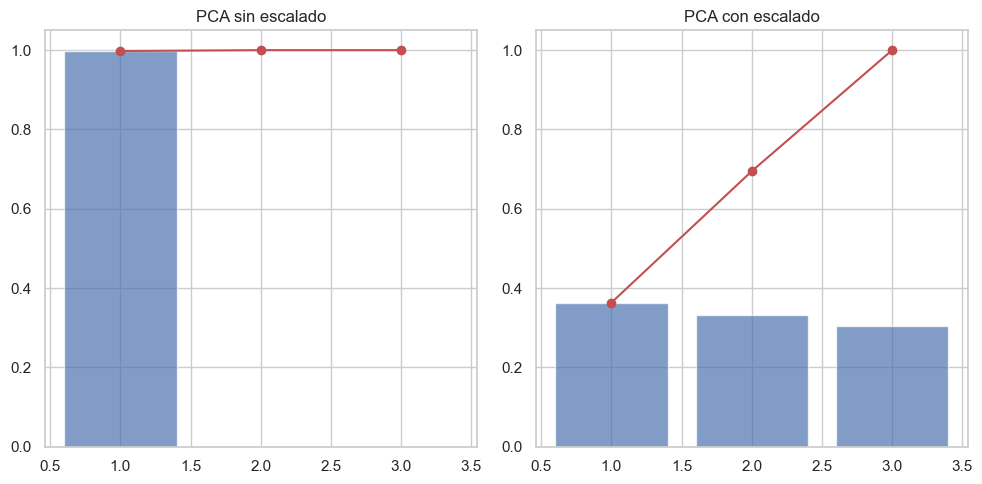

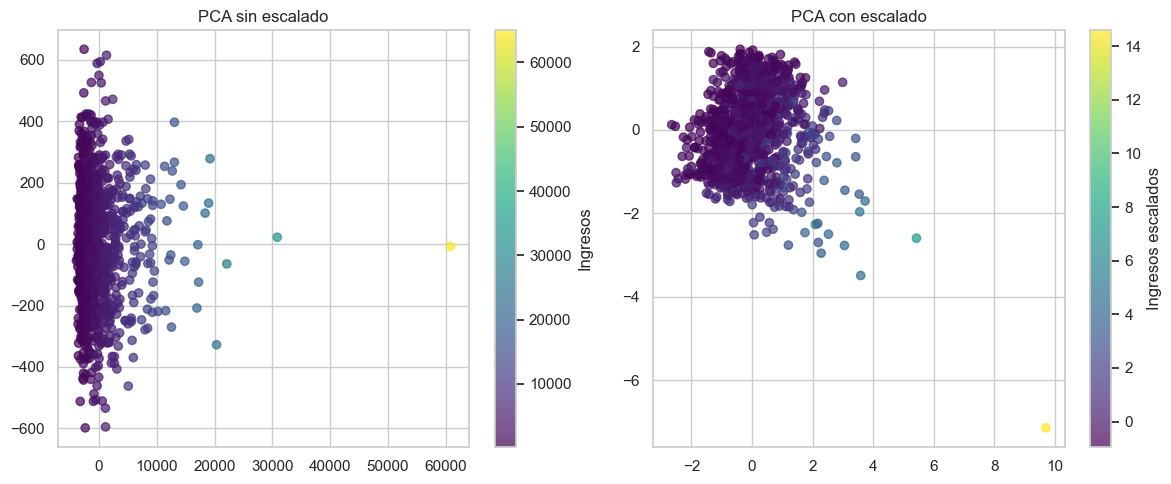


Componentes principales SIN escalado:
PC1: 1.00*Ingresos, 0.00*Edad, 0.00*Score Crédito
PC2: -0.00*Ingresos, 0.00*Edad, 1.00*Score Crédito
PC3: -0.00*Ingresos, 1.00*Edad, -0.00*Score Crédito

Componentes principales CON escalado:
PC1: 0.62*Ingresos, 0.36*Edad, 0.70*Score Crédito
PC2: -0.46*Ingresos, 0.88*Edad, -0.04*Score Crédito
PC3: -0.63*Ingresos, -0.30*Edad, 0.72*Score Crédito


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.decomposition import PCA
from scipy import stats
sns.set(style='whitegrid')

# --- Creación de datos sintéticos ---
np.random.seed(42)
ingresos = np.random.lognormal(mean=8, sigma=0.8, size=1000)
edad = np.random.uniform(18, 70, size=1000)
credito = np.random.normal(loc=500, scale=200, size=1000)
data = np.column_stack((ingresos, edad, credito))
feature_names = ['Ingresos', 'Edad', 'Score Crédito']

# --- Visualización de datos originales ---
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.histplot(data[:,0], kde=True, color='skyblue')
plt.title('Distribución de Ingresos')
plt.subplot(2, 2, 2)
sns.histplot(data[:,1], kde=True, color='salmon')
plt.title('Distribución de Edad')
plt.subplot(2, 2, 3)
sns.histplot(data[:,2], kde=True, color='lightgreen')
plt.title('Distribución de Score de Crédito')
plt.subplot(2, 2, 4)
plt.scatter(data[:,0], data[:,1], alpha=0.6, c=data[:,2], cmap='viridis')
plt.colorbar(label='Score Crédito')
plt.xlabel('Ingresos')
plt.ylabel('Edad')
plt.tight_layout()
plt.show()

# --- Escalado de datos ---
scaler_z = StandardScaler()
data_z = scaler_z.fit_transform(data)
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
data_minmax = scaler_minmax.fit_transform(data)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=data)
plt.xticks([0, 1, 2], feature_names)
plt.title('Datos Originales')
plt.ylim(-5, 150)
plt.subplot(1, 3, 2)
sns.boxplot(data=data_z)
plt.xticks([0, 1, 2], feature_names)
plt.title('StandardScaler')
plt.ylim(-5, 5)
plt.subplot(1, 3, 3)
sns.boxplot(data=data_minmax)
plt.xticks([0, 1, 2], feature_names)
plt.title('MinMaxScaler')
plt.ylim(-0.5, 1.5)
plt.tight_layout()
plt.show()

# --- Transformaciones ---
plt.figure(figsize=(15, 5))
log_ingresos = np.log(data[:,0])
plt.subplot(1, 3, 1)
sns.histplot(log_ingresos, kde=True, color='skyblue')
plt.title('Transformación Logarítmica')

bc = PowerTransformer(method='box-cox')
# CORRECCIÓN: Aplanar los datos para el cálculo de sesgo
bc_ingresos = bc.fit_transform(data[:,0].reshape(-1, 1))
bc_ingresos_flat = bc_ingresos.flatten()  # Convertir a 1D

plt.subplot(1, 3, 2)
sns.histplot(bc_ingresos, kde=True, color='salmon')
plt.title('Transformación Box-Cox')

skew_original = stats.skew(data[:,0])
skew_log = stats.skew(log_ingresos)
skew_bc = stats.skew(bc_ingresos_flat)  # Ahora es escalar

plt.subplot(1, 3, 3)
plt.bar(['Original', 'Log', 'Box-Cox'], [skew_original, skew_log, skew_bc], 
        color=['gray', 'blue', 'red'])
plt.title('Comparación de Sesgo')
plt.ylabel('Skewness')
plt.axhline(y=0, color='k', linestyle='--')
plt.tight_layout()
plt.show()

# --- PCA ---
pca_raw = PCA()
pca_raw.fit(data)
var_raw = pca_raw.explained_variance_ratio_
pca_scaled = PCA()
pca_scaled.fit(data_z)
var_scaled = pca_scaled.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1,4), var_raw, alpha=0.7)
plt.plot(range(1,4), np.cumsum(var_raw), 'ro-')
plt.title('PCA sin escalado')
plt.subplot(1, 2, 2)
plt.bar(range(1,4), var_scaled, alpha=0.7)
plt.plot(range(1,4), np.cumsum(var_scaled), 'ro-')
plt.title('PCA con escalado')
plt.tight_layout()
plt.show()

# --- Proyección PCA ---
proy_raw = pca_raw.transform(data)
proy_scaled = pca_scaled.transform(data_z)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(proy_raw[:,0], proy_raw[:,1], c=data[:,0], cmap='viridis', alpha=0.7)
plt.colorbar(label='Ingresos')
plt.title('PCA sin escalado')
plt.subplot(1, 2, 2)
plt.scatter(proy_scaled[:,0], proy_scaled[:,1], c=data_z[:,0], cmap='viridis', alpha=0.7)
plt.colorbar(label='Ingresos escalados')
plt.title('PCA con escalado')
plt.tight_layout()
plt.show()

# --- Interpretación de componentes ---
print("\nComponentes principales SIN escalado:")
for i, component in enumerate(pca_raw.components_):
    print(f"PC{i+1}: {', '.join([f'{coef:.2f}*{name}' for coef, name in zip(component, feature_names)])}")

print("\nComponentes principales CON escalado:")
for i, component in enumerate(pca_scaled.components_):
    print(f"PC{i+1}: {', '.join([f'{coef:.2f}*{name}' for coef, name in zip(component, feature_names)])}")